#### Imports

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
%matplotlib inline

#### Reading the data

In [4]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### Summarize the data


In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Check the existent of nan values 

In [65]:
columns = ['TV', 'radio', 'newspaper', 'sales']

for col in columns: 
    if df[col].isna().sum() != 0 :
        df[col] = fill_mising_values(col)
    else:
        print(f"No missing value in {col}")


No missing value in TV
No missing value in radio
No missing value in newspaper
No missing value in sales


#### Visualize

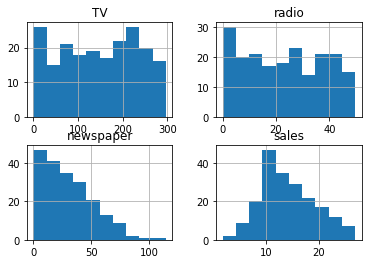

In [66]:
df.hist()
plt.show()

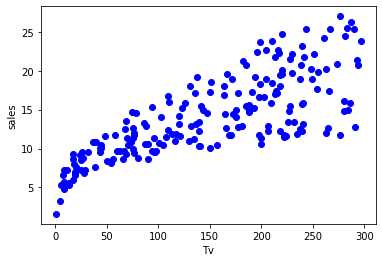

In [67]:
plt.scatter(df.TV, df.sales,  color='blue')
plt.xlabel("Tv")
plt.ylabel("sales")
plt.show()

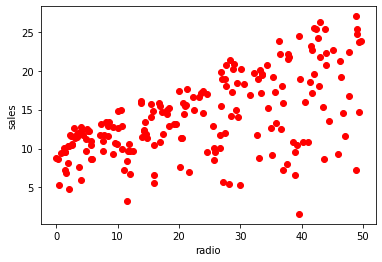

In [68]:
plt.scatter(df.radio, df.sales,  color='red')
plt.xlabel("radio")
plt.ylabel("sales")
plt.show()

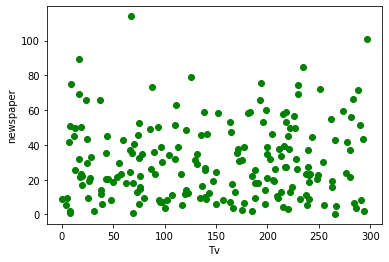

In [69]:
plt.scatter(df.TV, df.newspaper,  color='green')
plt.xlabel("Tv")
plt.ylabel("newspaper")
plt.show()

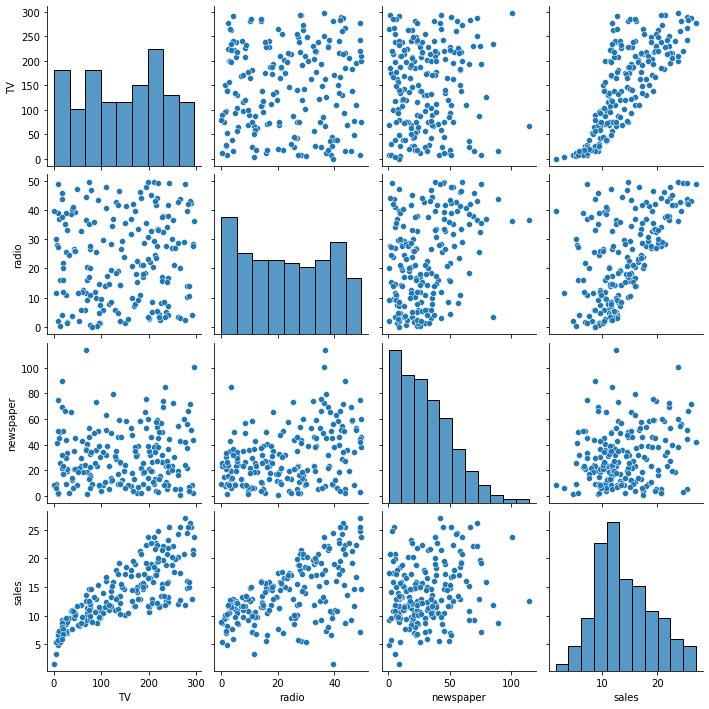

In [70]:
sns.pairplot(df)

In [71]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

#### Plots over Train and Test

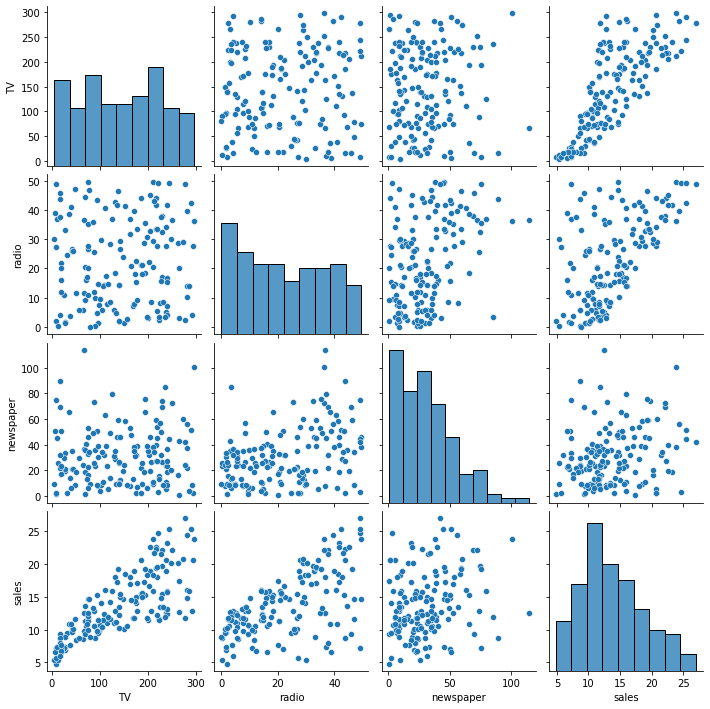

In [20]:
sns.pairplot(train)

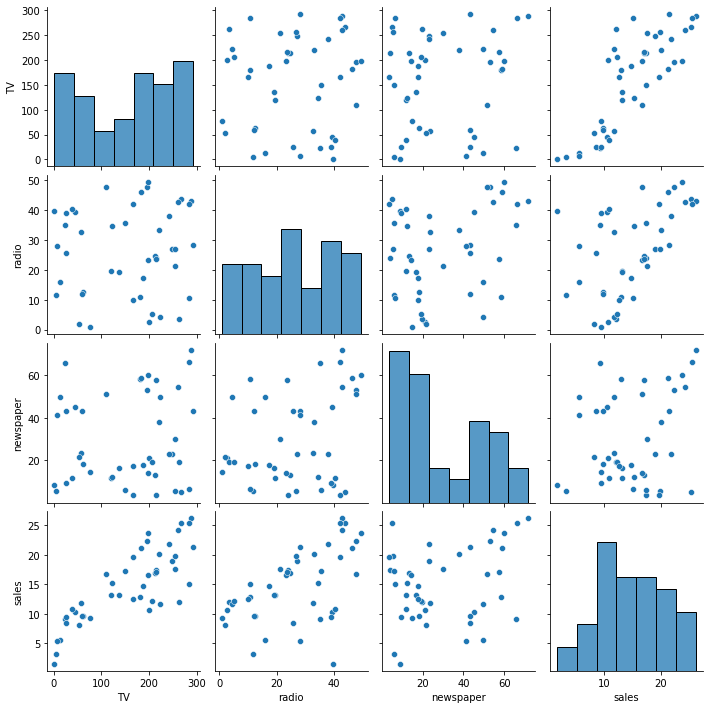

In [21]:
sns.pairplot(test)

#### Linear models

In [45]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['TV']])
train_y = np.asanyarray(train[['sales']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['TV']])
test_y = np.asanyarray(test[['sales']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Coefficients:  [[0.04530296]]
Intercept:  [7.25656874]
Mean absolute error: 2.82
Residual sum of squares (MSE): 13.04
R2-score: 0.64


In [61]:
X = sm.add_constant(train_x)  
est = sm.OLS(train_y, X)
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     461.7
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           8.10e-76
Time:                        16:26:12   Log-Likelihood:                -286.68
No. Observations:                 155   AIC:                             581.4
Df Residuals:                     151   BIC:                             593.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4394      0.326     10.561      0.0

In [46]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['radio']])
train_y = np.asanyarray(train[['sales']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['TV']])
test_y = np.asanyarray(test[['radio']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Coefficients:  [[0.19580994]]
Intercept:  [9.41134886]
Mean absolute error: 22.04
Residual sum of squares (MSE): 695.27
R2-score: -2.36


In [62]:
X = sm.add_constant(train_x)  
est = sm.OLS(train_y, X)
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     461.7
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           8.10e-76
Time:                        16:26:51   Log-Likelihood:                -286.68
No. Observations:                 155   AIC:                             581.4
Df Residuals:                     151   BIC:                             593.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4394      0.326     10.561      0.0

In [47]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['newspaper']])
train_y = np.asanyarray(train[['sales']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['newspaper']])
test_y = np.asanyarray(test[['sales']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Coefficients:  [[0.04951151]]
Intercept:  [12.26921341]
Mean absolute error: 5.04
Residual sum of squares (MSE): 35.62
R2-score: 0.03


In [63]:
X = sm.add_constant(train_x)  
est = sm.OLS(train_y, X)
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     461.7
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           8.10e-76
Time:                        16:27:02   Log-Likelihood:                -286.68
No. Observations:                 155   AIC:                             581.4
Df Residuals:                     151   BIC:                             593.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4394      0.326     10.561      0.0

##### Polynomial model

In [48]:
train_x = np.asanyarray(train[['TV', 'radio', 'newspaper']])
train_y = np.asanyarray(train[['sales']])

test_x = np.asanyarray(test[['TV', 'radio', 'newspaper']])
test_y = np.asanyarray(test[['sales']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       [1.00000e+00, 1.51500e+02, 4.13000e+01, ..., 1.70569e+03,
        2.41605e+03, 3.42225e+03],
       ...,
       [1.00000e+00, 9.42000e+01, 4.90000e+00, ..., 2.40100e+01,
        3.96900e+01, 6.56100e+01],
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [60]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 5.04
Residual sum of squares (MSE): 35.62
R2-score: 0.03


In [57]:
X_ = sm.add_constant(train_x_poly)
ems = sm.OLS(train_y,X_)
ems = ems.fit()
print(ems.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2016.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.47e-147
Time:                        16:18:46   Log-Likelihood:                -91.559
No. Observations:                 155   AIC:                             203.1
Df Residuals:                     145   BIC:                             233.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2670      0.194     27.100      0.0